Wrangling the cdc anxiety or depression api

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# install.packages("magrittr")
# install.packages("purrr")
# install.packages("glue")
# install.packages("stringr")
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract




In [3]:
# install.packages("rvest")
# remotes::install_github("dmi3kno/polite")("politer")
# install.packages("xml2")
library(rvest) # rvest makes scraping easier
#library(polite) # polite is the "polite" version of rvest
library(xml2) # makes it easier to work with HTML and XML from R



Attaching package: 'rvest'


The following object is masked from 'package:readr':

    guess_encoding




In [4]:
library("httr")
library("jsonlite")
library("dplyr")


Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten




In [27]:
options(repr.plot.width=25, repr.plot.height=10)

In [5]:
library(httr)
request = GET("https://data.cdc.gov/resource/8pt5-q6wp.json")
request
http_status(request) #Checks that the request has been successfully completed.

str(request$content) #We see that the content of the api we are looking for is still in its raw form, so it must be converted.

cdc_request <- content(request, as='text') #This converts the content of the request into a readable form for humans

str(cdc_request)

Response [https://data.cdc.gov/resource/8pt5-q6wp.json]
  Date: 2022-10-14 23:16
  Status: 200
  Content-Type: application/json;charset=utf-8
  Size: 398 kB
[{"indicator":"Symptoms of Depressive Disorder","group":"National Estimate","...
,{"indicator":"Symptoms of Depressive Disorder","group":"By Age","state":"Uni...
,{"indicator":"Symptoms of Depressive Disorder","group":"By Age","state":"Uni...
,{"indicator":"Symptoms of Depressive Disorder","group":"By Age","state":"Uni...
,{"indicator":"Symptoms of Depressive Disorder","group":"By Age","state":"Uni...
,{"indicator":"Symptoms of Depressive Disorder","group":"By Age","state":"Uni...
,{"indicator":"Symptoms of Depressive Disorder","group":"By Age","state":"Uni...
,{"indicator":"Symptoms of Depressive Disorder","group":"By Age","state":"Uni...
,{"indicator":"Symptoms of Depressive Disorder","group":"By Sex","state":"Uni...
,{"indicator":"Symptoms of Depressive Disorder","group":"By Sex","state":"Uni...
...

$category
[1] "Success"

$reason
[1] "OK"

$message
[1] "Success: (200) OK"

 raw [1:397728] 5b 7b 22 69 ...
 chr "[{\"indicator\":\"Symptoms of Depressive Disorder\",\"group\":\"National Estimate\",\"state\":\"United States\""| __truncated__


In [6]:
cdc_df <- fromJSON(cdc_request, flatten = TRUE) #Puts the data from the request into a dataframe
cdc_df

,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,lowci,highci,confidence_interval,quartile_range
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,23.5,22.7,24.3,22.7 - 24.3,NA
2,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,32.7,30.2,35.2,30.2 - 35.2,NA
3,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,25.7,24.1,27.3,24.1 - 27.3,NA
4,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,24.8,23.3,26.2,23.3 - 26.2,NA
5,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,23.2,21.5,25,21.5 - 25.0,NA
6,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,18.4,17,19.7,17.0 - 19.7,NA
7,Symptoms of Depressive Disorder,By Age,United States,70 - 79 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,13.6,11.8,15.5,11.8 - 15.5,NA
8,Symptoms of Depressive Disorder,By Age,United States,80 years and above,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,14.4,9,21.4,9.0 - 21.4,NA
9,Symptoms of Depressive Disorder,By Sex,United States,Male,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,20.8,19.6,22,19.6 - 22.0,NA


In [9]:
education_df <- cdc_df %>% filter(group=='By Education')
education_df

indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,lowci,highci,confidence_interval,quartile_range
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Symptoms of Depressive Disorder,By Education,United States,Less than a high school diploma,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,32.7,27.8,38,27.8 - 38.0,NA
Symptoms of Depressive Disorder,By Education,United States,High school diploma or GED,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,25.4,23.9,26.9,23.9 - 26.9,NA
Symptoms of Depressive Disorder,By Education,United States,Some college/Associate's degree,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,25.6,24.4,26.9,24.4 - 26.9,NA
Symptoms of Depressive Disorder,By Education,United States,Bachelor's degree or higher,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,17.6,16.8,18.4,16.8 - 18.4,NA
Symptoms of Anxiety Disorder,By Education,United States,Less than a high school diploma,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,37.3,32.4,42.4,32.4 - 42.4,NA
Symptoms of Anxiety Disorder,By Education,United States,High school diploma or GED,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,30.6,29,32.3,29.0 - 32.3,NA
Symptoms of Anxiety Disorder,By Education,United States,Some college/Associate's degree,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,33.5,32,35.1,32.0 - 35.1,NA
Symptoms of Anxiety Disorder,By Education,United States,Bachelor's degree or higher,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,27,26.3,27.8,26.3 - 27.8,NA
Symptoms of Anxiety Disorder or Depressive Disorder,By Education,United States,Less than a high school diploma,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,45.4,40.3,50.5,40.3 - 50.5,NA


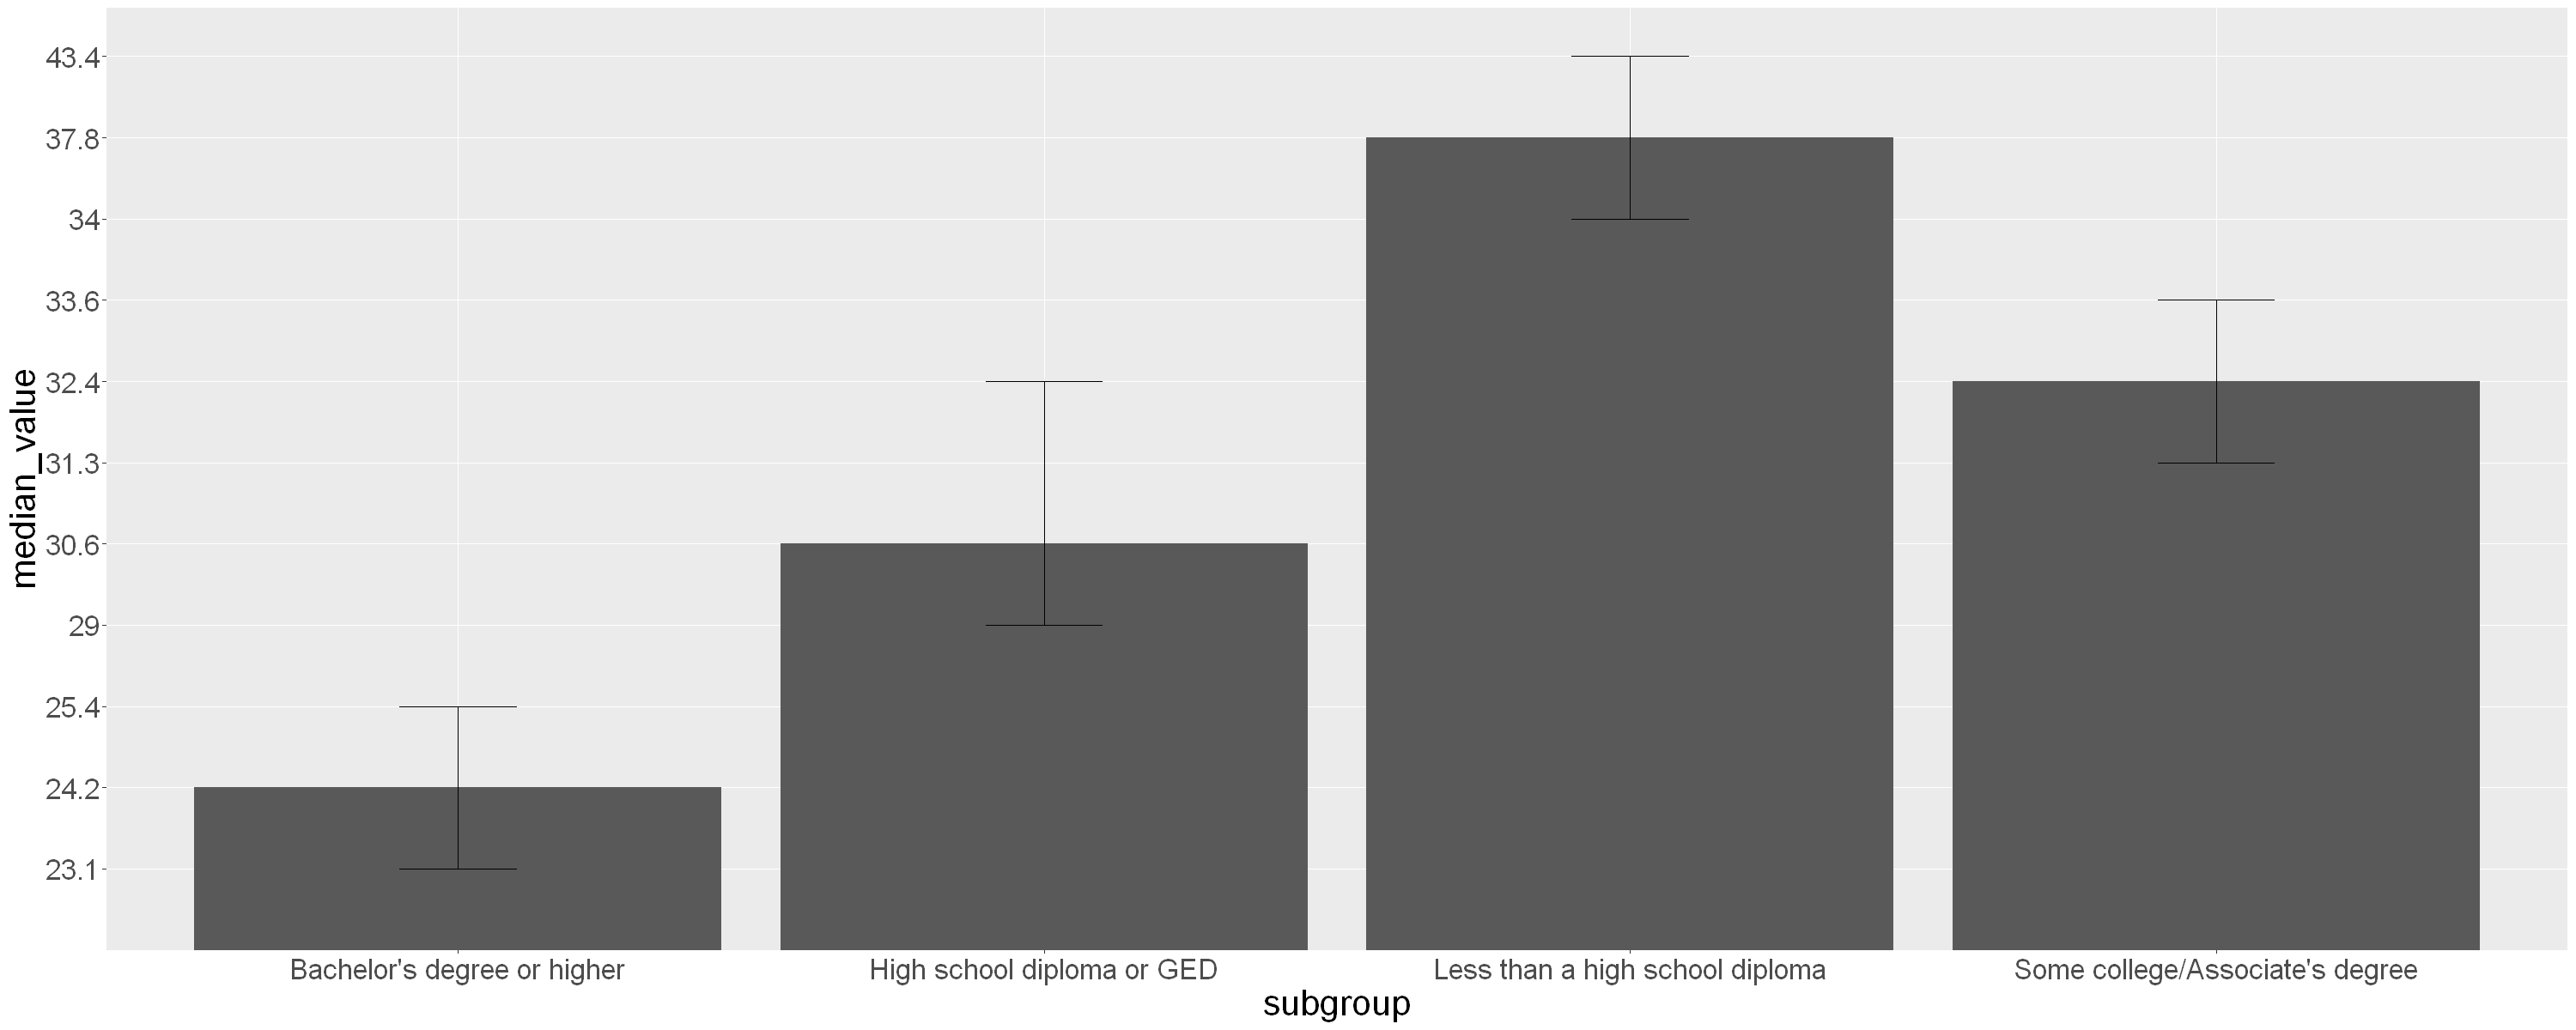

In [31]:
education_df %>%
    group_by(subgroup) %>%
    summarise(median_value = median(value), high_ci = median(highci), low_ci = median(lowci)) %>%
    ggplot(aes(x=subgroup, y=median_value)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=low_ci, ymax=high_ci), width=.2, position=position_dodge(.9)) + 
    theme(text = element_text(size = 25)) +
    labs(x = 'Education', y = 'Anxiety/Depression Percentage', title = 'Anxiety or Depression by Education in the USA')  


In [34]:
age_df <- cdc_df %>% filter(group=='By Age')
head(age_df)

,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,lowci,highci,confidence_interval,quartile_range
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,32.7,30.2,35.2,30.2 - 35.2,NA
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,25.7,24.1,27.3,24.1 - 27.3,NA
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,24.8,23.3,26.2,23.3 - 26.2,NA
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,23.2,21.5,25,21.5 - 25.0,NA
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,18.4,17,19.7,17.0 - 19.7,NA
6,Symptoms of Depressive Disorder,By Age,United States,70 - 79 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,13.6,11.8,15.5,11.8 - 15.5,NA


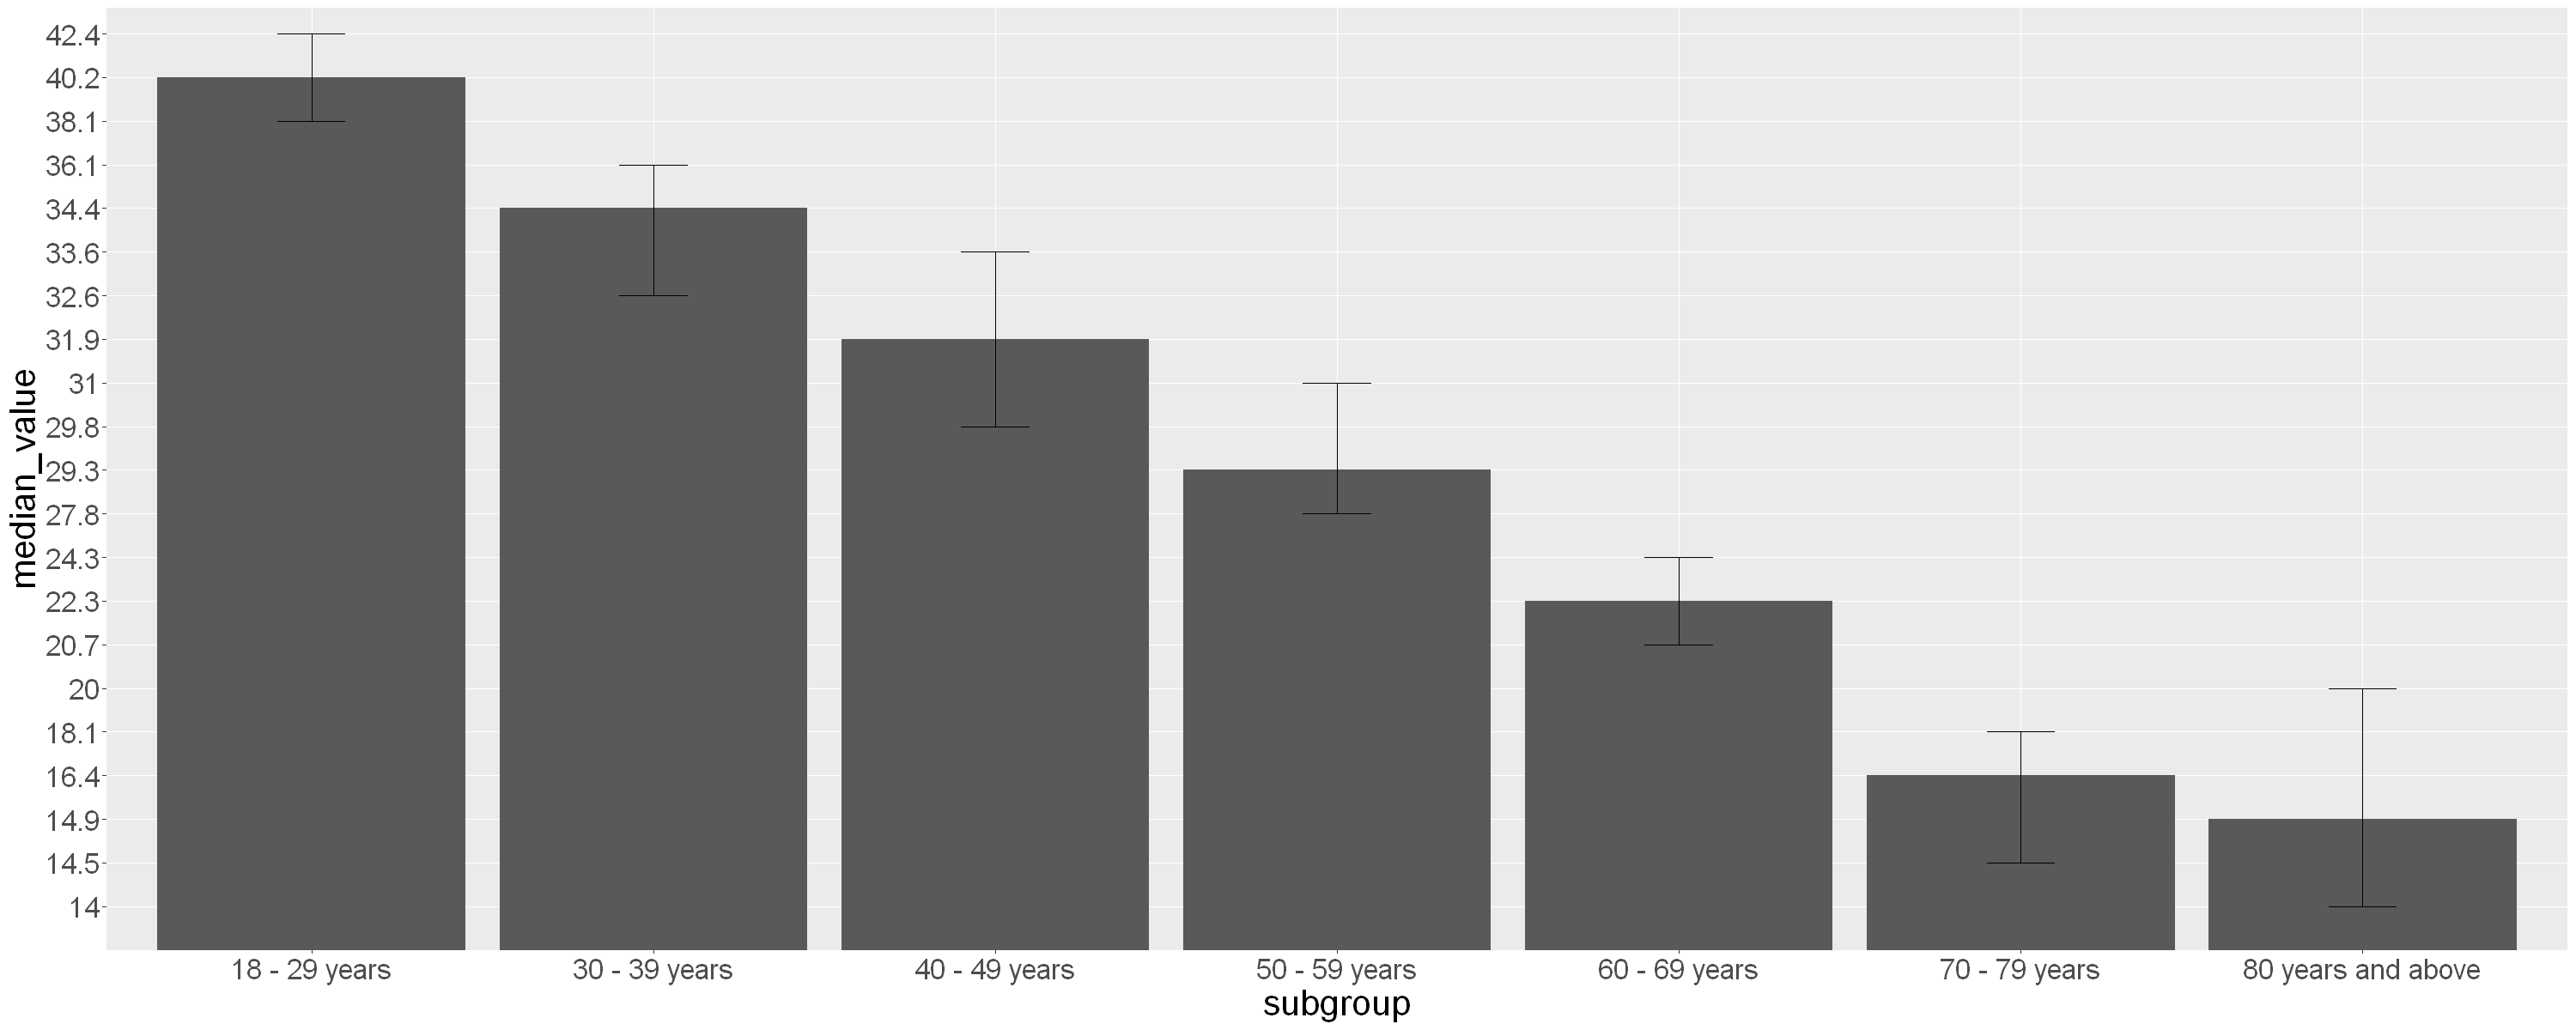

In [33]:
age_df %>%
    group_by(subgroup) %>%
    summarise(median_value = median(value), high_ci = median(highci), low_ci = median(lowci)) %>%
    ggplot(aes(x=subgroup, y=median_value)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=low_ci, ymax=high_ci), width=.2, position=position_dodge(.9)) + 
    theme(text = element_text(size = 25)) +
    labs(x = 'Age Group', y = 'Anxiety/Depression Percentage', title = 'Anxiety or Depression by Age in the USA')  


In [35]:
sex_df <- cdc_df %>% filter(group=='By Sex')
head(sex_df)

,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,lowci,highci,confidence_interval,quartile_range
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Symptoms of Depressive Disorder,By Sex,United States,Male,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,20.8,19.6,22,19.6 - 22.0,NA
2,Symptoms of Depressive Disorder,By Sex,United States,Female,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,26.1,25.2,27.1,25.2 - 27.1,NA
3,Symptoms of Anxiety Disorder,By Sex,United States,Male,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,26.1,24.7,27.5,24.7 - 27.5,NA
4,Symptoms of Anxiety Disorder,By Sex,United States,Female,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,35.4,34.5,36.3,34.5 - 36.3,NA
5,Symptoms of Anxiety Disorder or Depressive Disorder,By Sex,United States,Male,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,31,29.6,32.3,29.6 - 32.3,NA
6,Symptoms of Anxiety Disorder or Depressive Disorder,By Sex,United States,Female,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,40.7,39.7,41.6,39.7 - 41.6,NA


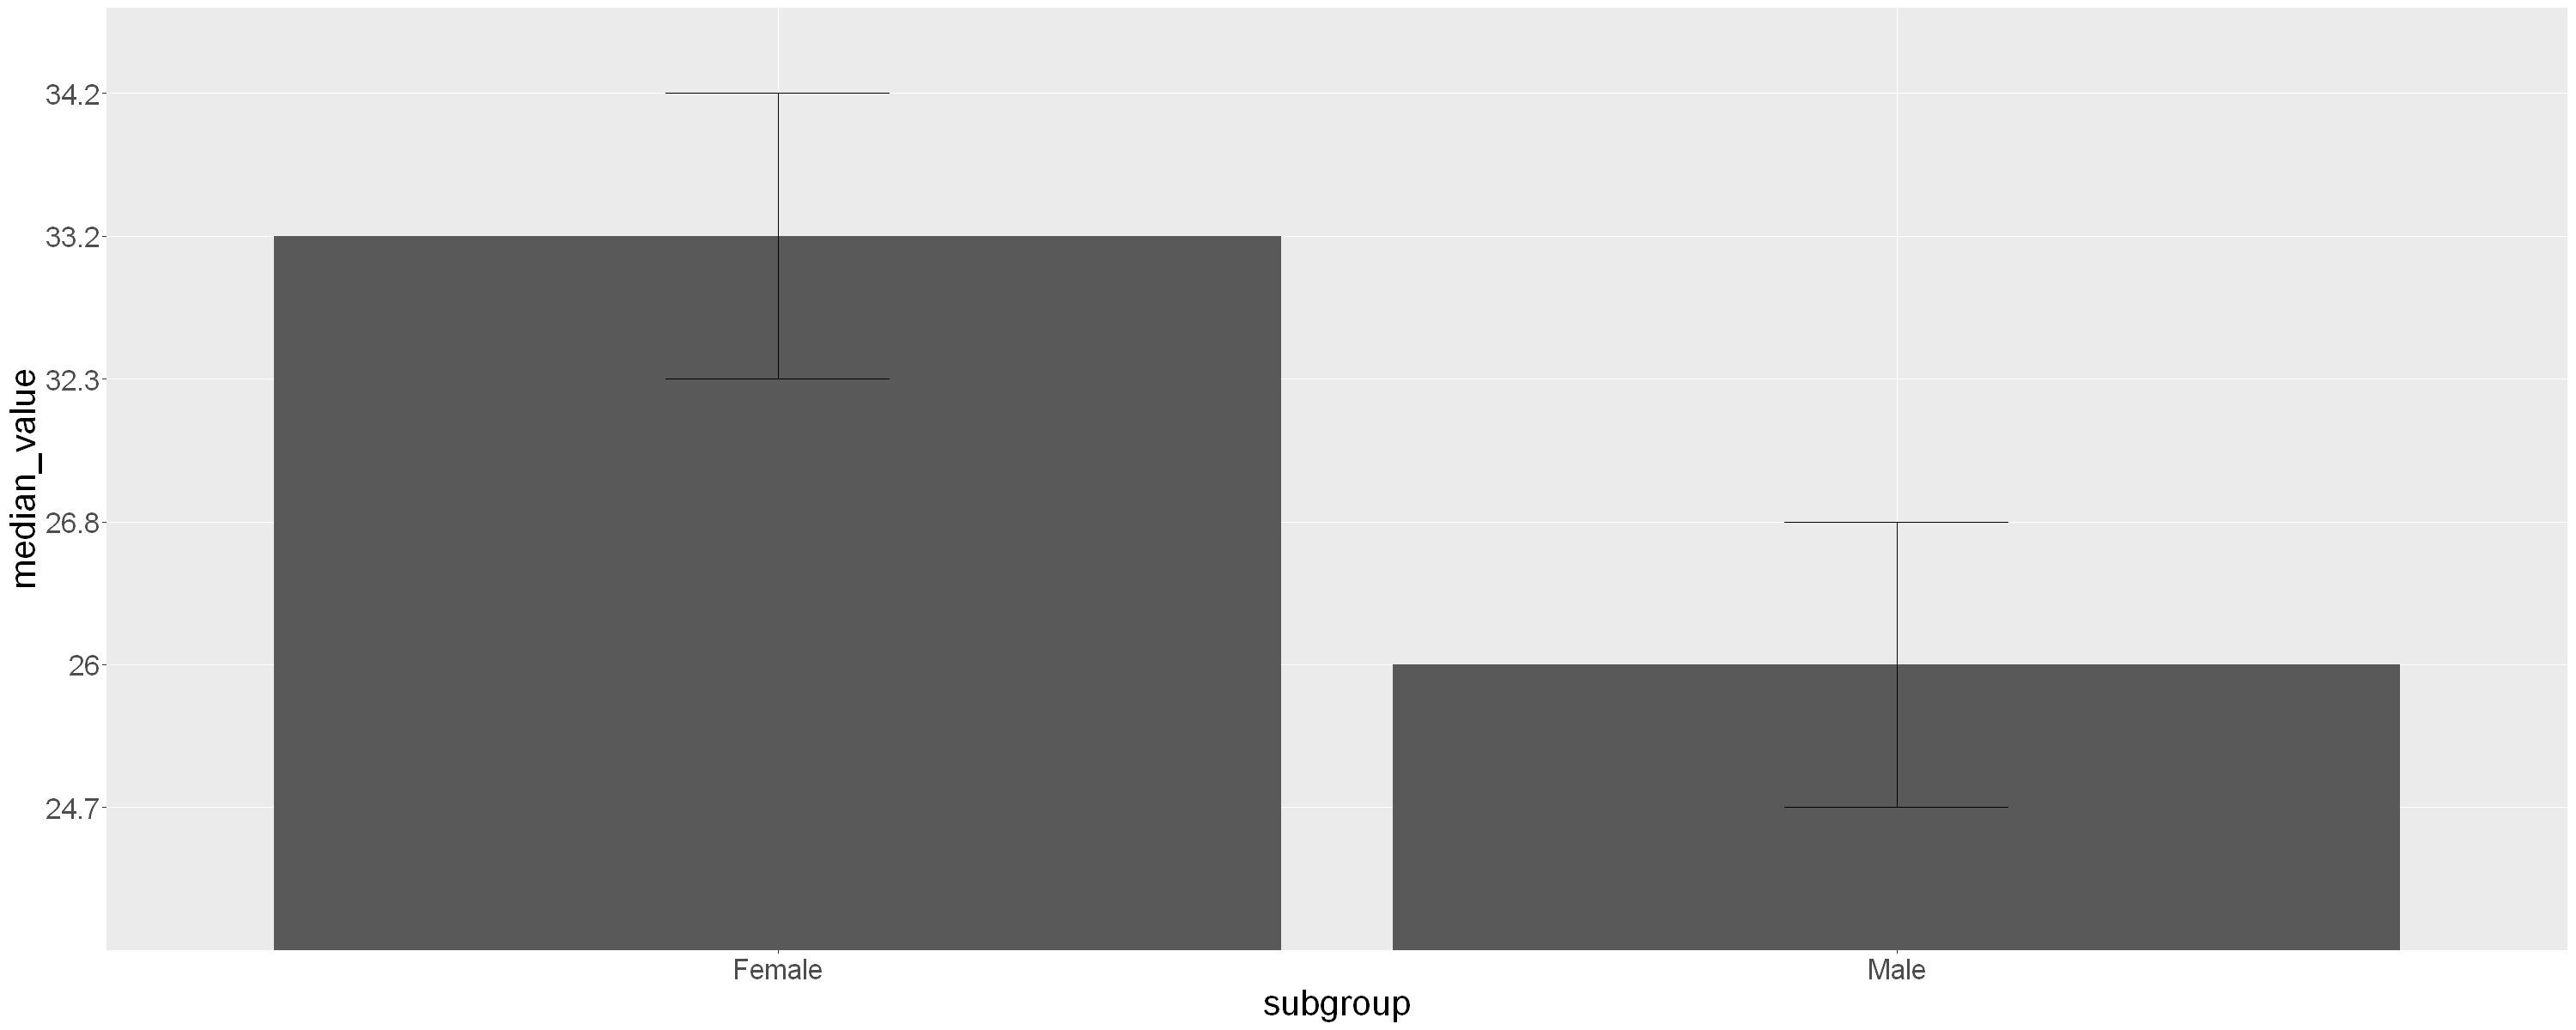

In [36]:
sex_df %>%
    group_by(subgroup) %>%
    summarise(median_value = median(value), high_ci = median(highci), low_ci = median(lowci)) %>%
    ggplot(aes(x=subgroup, y=median_value)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=low_ci, ymax=high_ci), width=.2, position=position_dodge(.9)) + 
    theme(text = element_text(size = 25)) +
    labs(x = 'Gender', y = 'Anxiety/Depression Percentage', title = 'Anxiety or Depression by Gender in the USA')  
